In [5]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
movie_dataset_df=pd.read_csv('./Movie Dataset/movies_dataset.csv', index_col=False)
movie_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

In [7]:
movie_dataset_df.head(10)

MovieID                         Title        Genre  ReleaseYear  \
0        1          Might toward capital       Comedy         2003   
1        2         He however experience       Comedy         1988   
2        3  Star responsibility politics       Comedy         1971   
3        4                  Exactly live       Comedy         1998   
4        5      Focus improve especially  Documentary         2021   
5        6              Deal reveal fine        Drama         1996   
6        7                     Drug when       Comedy         1991   
7        8              Almost option of       Horror         1990   
8        9           Film about training        Drama         1983   
9       10         Begin difficult world  Documentary         2005   

  ReleaseDate Country    BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  \
0  28-09-2003   China   6577427.79       6613685.82          15472035.66   
1  14-02-1988     USA   1883810.10       1930949.15           3637731.12   
2  02-11-1971     USA   2468079.29       4186694.69           7165111.24   
3  06-08-1998     USA   1447311.46       2023683.92           4373820.26   
4  17-12-2021   India    900915.86       2129629.10           3113017.38   
5  09-05-1996     USA   6356058.11       6790420.62          12332192.70   
6  24-09-1991     USA  30881640.04      35569499.73          61633322.70   
7  04-08-1990     USA   5249748.92       3569563.24           6059156.85   
8  12-03-1983     USA   4746218.15       6361493.82           9506139.90   
9  06-09-2005     USA   1354686.21       3837061.91           6747065.42   

   Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  \
0            1778530.85         3034053.32         6.2                   58   
1             247115.74          831828.84         5.2                   44   
2             878453.95         2171405.93         5.5                   55   
3             570657.72          898886.01         7.3                   87   
4             361189.37          861775.91         6.1                   67   
5            1877251.88         3681524.22         8.9                  100   
6            5771559.63        21305870.04         3.6                   39   
7             429972.59         1513066.66         7.3                   75   
8            1612321.12         2977114.88         6.9                   69   
9             440667.37         2031776.94         8.4                   87   

   NumVotesIMDb  NumVotesRT         Director           LeadActor  
0          7865       10596   Kristina Moore     Brian Mccormick  
1          1708         220  Benjamin Hudson         Ashley Pena  
2          4678        7805      Kayla Young     Alexander Haley  
3          2467        1751     Michael Ross     Patrick Barnett  
4          5555         697   Faith Franklin  Duane Fletcher DDS  
5           362         229  Thomas Peterson     Carolyn Calhoun  
6           556          98       Maria Lane        Melissa Cain  
7           283        1219    Diane Skinner    Catherine Willis  
8          1041        1467  Albert Phillips       Ashley Reeves  
9         10079         514   Francisco Ford      Richard Miller

In [8]:
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
movie_dataset_df['ReleaseMonth']=((pd.to_datetime(movie_dataset_df.ReleaseDate)).dt.month).map(month_map)
movie_dataset_df.head()

MovieID                         Title        Genre  ReleaseYear  \
0        1          Might toward capital       Comedy         2003   
1        2         He however experience       Comedy         1988   
2        3  Star responsibility politics       Comedy         1971   
3        4                  Exactly live       Comedy         1998   
4        5      Focus improve especially  Documentary         2021   

  ReleaseDate Country   BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  \
0  28-09-2003   China  6577427.79       6613685.82          15472035.66   
1  14-02-1988     USA  1883810.10       1930949.15           3637731.12   
2  02-11-1971     USA  2468079.29       4186694.69           7165111.24   
3  06-08-1998     USA  1447311.46       2023683.92           4373820.26   
4  17-12-2021   India   900915.86       2129629.10           3113017.38   

   Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  \
0            1778530.85         3034053.32         6.2                   58   
1             247115.74          831828.84         5.2                   44   
2             878453.95         2171405.93         5.5                   55   
3             570657.72          898886.01         7.3                   87   
4             361189.37          861775.91         6.1                   67   

   NumVotesIMDb  NumVotesRT         Director           LeadActor ReleaseMonth  
0          7865       10596   Kristina Moore     Brian Mccormick          Sep  
1          1708         220  Benjamin Hudson         Ashley Pena          Feb  
2          4678        7805      Kayla Young     Alexander Haley          Feb  
3          2467        1751     Michael Ross     Patrick Barnett          Jun  
4          5555         697   Faith Franklin  Duane Fletcher DDS          Dec

In [9]:
movie_dataset_df.duplicated().sum()

0

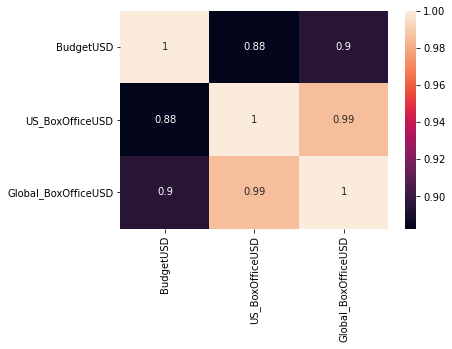

In [10]:
sns.heatmap(movie_dataset_df[['BudgetUSD','US_BoxOfficeUSD','Global_BoxOfficeUSD']].corr(),annot=True);

#### There seems to be a linear relationship between budget and revenue and can be shown in the plot below.

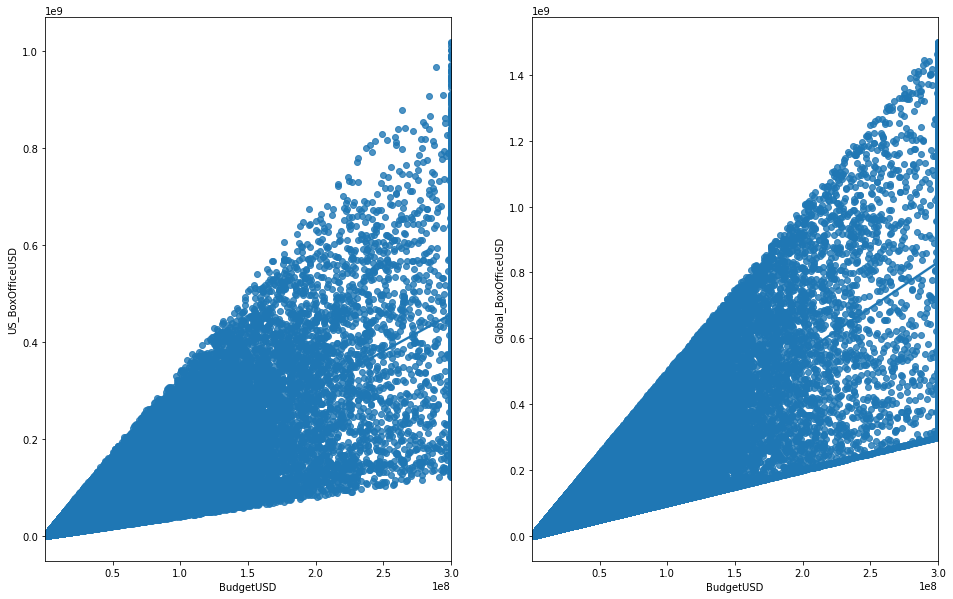

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(16,10))
sns.regplot(x='BudgetUSD', y='US_BoxOfficeUSD', data=movie_dataset_df, ax=ax[0])
sns.regplot(x='BudgetUSD', y='Global_BoxOfficeUSD', data=movie_dataset_df, ax=ax[1]);

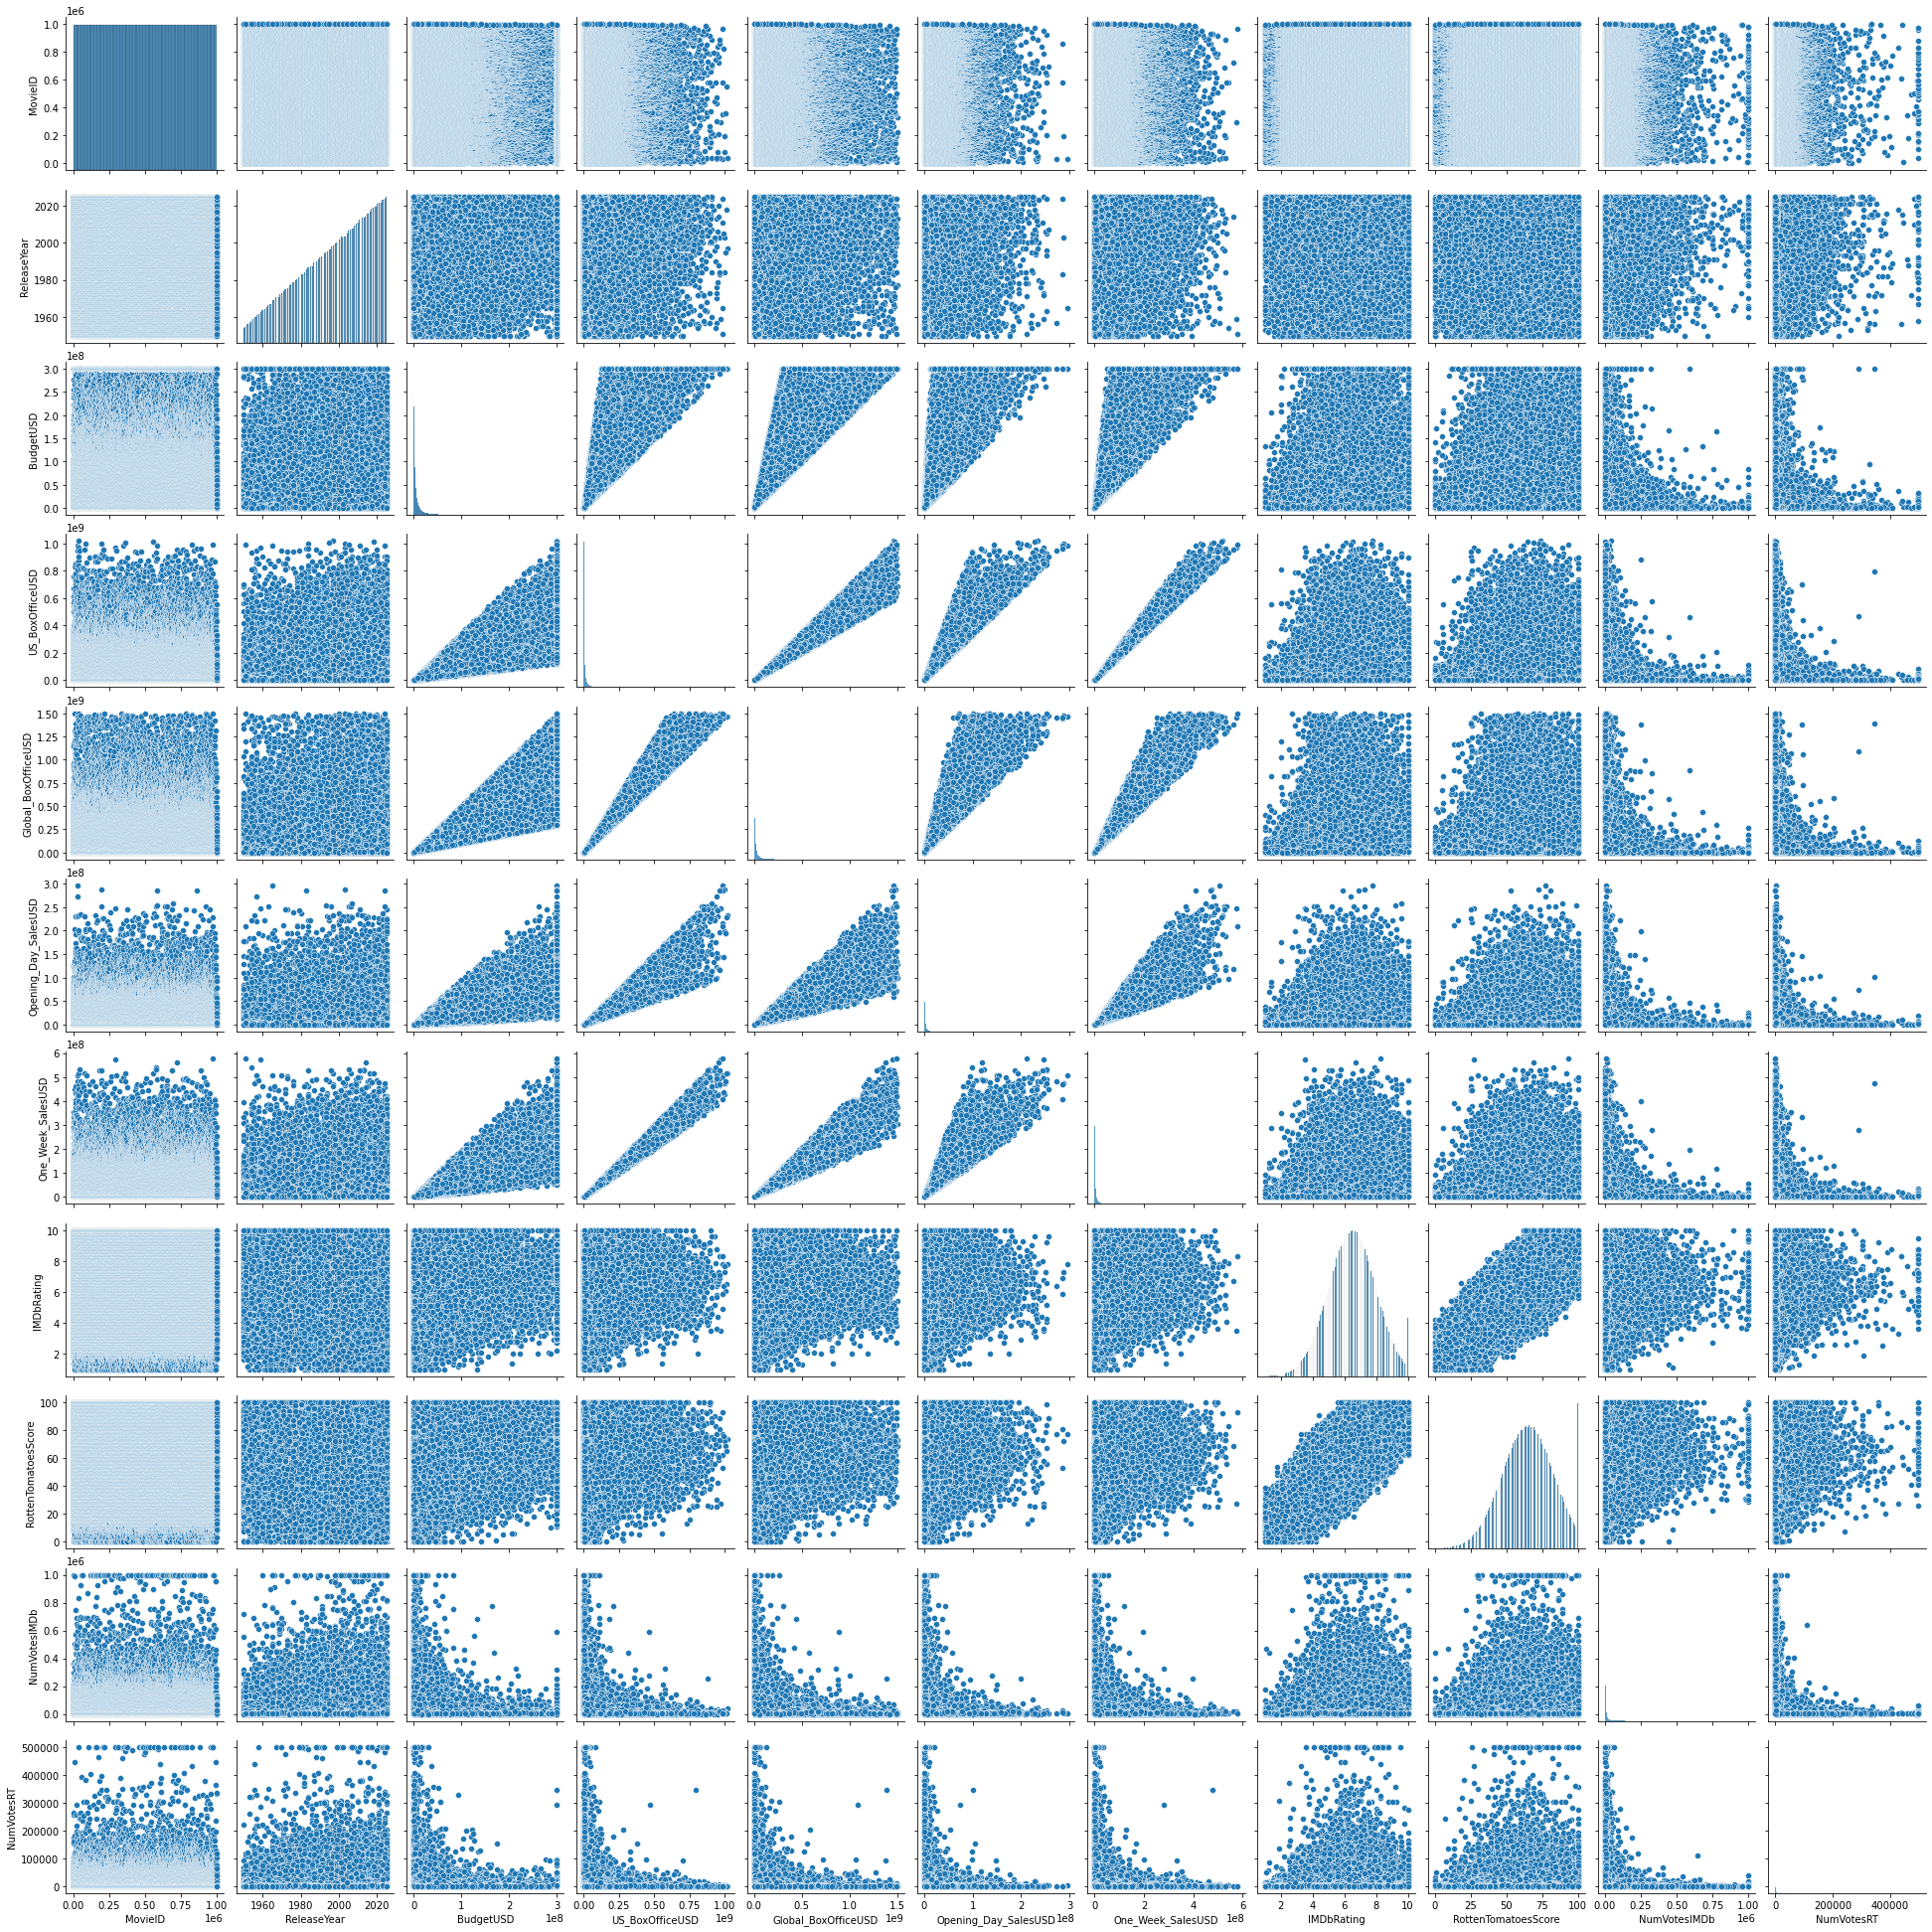

In [12]:
sns.pairplot(movie_dataset_df);